In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from lib import *
plt.style.use('../peptidome.mplstyle')

In [2]:
df = pd.read_csv(datadir + 'patricbrc_meta.tsv.gz', sep='\t')

/home/amayer/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,6,7,8,9,10,11,12,14,19,21,34,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,65) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df.head()

,genome_id,genome_name,organism_name,taxon_id,genome_status,strain,serovar,biovar,pathovar,mlst,...,motility,sporulation,temperature_range,optimal_temperature,salinity,oxygen_requirement,habitat,disease,comments,additional_metadata
0,469009.4,"""'Brassica napus' phytoplasma strain TW1""",NaN,469009,WGS,TW1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Genome sequence of a strain of bacteria that c...,sample_type:metagenomic assembly;collected_by:...
1,1309411.5,"""'Deinococcus soli' Cha et al. 2014 strain N5""",NaN,1309411,Complete,N5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Genome sequencing of a Gamma-Radiation-Resista...,sample_type:bacterial
2,1123738.3,"""'Echinacea purpurea' witches'-broom phytoplas...",NaN,1123738,WGS,NCHU2014,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,'Echinacea purpurea' witches'-broom phytoplasm...,lab_host:Catharanthus roseus
3,551115.6,"""'Nostoc azollae' 0708""",'Nostoc azollae' 0708,551115,Complete,708,NaN,NaN,NaN,NaN,...,Yes,NaN,Mesophilic,-,NaN,Aerobic,Multiple,NaN,"Nostoc azollae 0708. Nostoc azollae 0708, also...",NaN
4,1856298.3,"""'Osedax' symbiont bacterium Rs2_46_30_T18 str...",NaN,1856298,WGS,Rs2_46_30_T18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In this study, we simulate the Deepwater Horiz...",sample_type:metagenomic assembly


In [7]:
df.columns

Index(['genome_id', 'genome_name', 'organism_name', 'taxon_id',
       'genome_status', 'strain', 'serovar', 'biovar', 'pathovar', 'mlst',
       'other_typing', 'culture_collection', 'type_strain', 'completion_date',
       'publication', 'bioproject_accession', 'biosample_accession',
       'assembly_accession', 'genbank_accessions', 'refseq_accessions',
       'sequencing_centers', 'sequencing_status', 'sequencing_platform',
       'sequencing_depth', 'assembly_method', 'chromosomes', 'plasmids',
       'contigs', 'sequences', 'genome_length', 'gc_content', 'patric_cds',
       'brc1_cds', 'refseq_cds', 'isolation_site', 'isolation_source',
       'isolation_comments', 'collection_date', 'isolation_country',
       'geographic_location', 'latitude', 'longitude', 'altitude', 'depth',
       'other_environmental', 'host_name', 'host_gender', 'host_age',
       'host_health', 'body_sample_site', 'body_sample_subsite',
       'other_clinical', 'antimicrobial_resistance',
       'antimic

In [8]:
df['host_name'].value_counts()

Human, Homo sapiens            128127
Cow, Bos taurus                  6915
Pig, Sus scrofa                  4727
Chicken, Gallus gallus           3137
Dog, Canis lupus familiaris      1055
                                ...  
Macroplea mutica                    1
mssing                              1
Paramecium biaurelia                1
Opuntia ficus-indica                1
Vibrio Parahaemolyticus             1
Name: host_name, Length: 6898, dtype: int64

In [10]:
df[df['host_name']=='Human, Homo sapiens']['taxon_id'].value_counts()

1773       16792
562        10897
1313        9308
573         9055
1280        6818
           ...  
2292278        1
1448490        1
1421855        1
1413526        1
1310720        1
Name: taxon_id, Length: 18162, dtype: int64

(array([3.7000e+01, 2.3000e+01, 1.1120e+03, 4.6780e+04, 9.5844e+04,
        9.9791e+04, 5.6635e+04, 7.3399e+04, 5.9330e+03, 3.0000e+00]),
 array([ 0.   ,  8.748, 17.496, 26.244, 34.992, 43.74 , 52.488, 61.236,
        69.984, 78.732, 87.48 ]),
 <BarContainer object of 10 artists>)

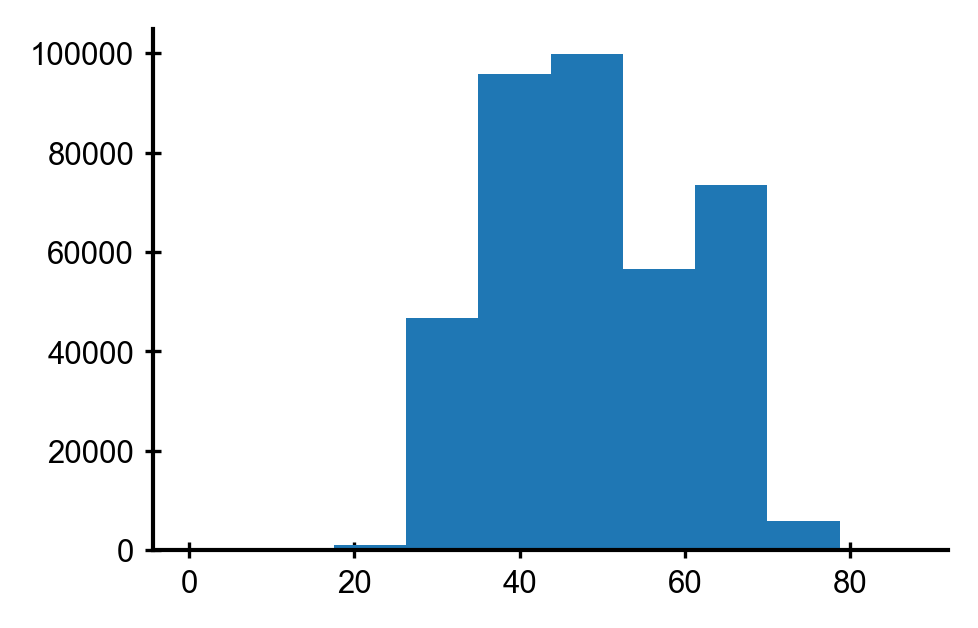

In [12]:
plt.hist(df['gc_content'])